<a href="https://colab.research.google.com/github/NadilaAmaliaaa/MACHINE_LEARNING/blob/main/Jobsheet%2010%20-%20CNN/Tugas2_ML10_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
with np.load('/content/mnist.npz') as data:
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [ ]:
# Pra-pemrosesan data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Menambah dimensi untuk channel (grayscale)
x_test = np.expand_dims(x_test, axis=-1)  # Menambah dimensi untuk channel (grayscale)

# Mengubah label ke bentuk one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/.255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow(x_train,
                                  y_train,
                                  batch_size=32)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/.255)
test_set = test_datagen.flow(x_test,
                             y_test,
                             batch_size=32)

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D(2,2))
cnn.add(layers.Conv2D(128, (3,3), activation='relu'))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.compile(optimizer='adam',
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = cnn.fit(
    training_set,
    epochs = 50,
    validation_data=test_set,
    callbacks=[reduce_lr,early_stopping])

Epoch 1/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2156 - accuracy: 0.9312 - val_loss: 0.0711 - val_accuracy: 0.9764 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.0672 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 3/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0659 - accuracy: 0.9790 - val_loss: 0.0411 - val_accuracy: 0.9870 - lr: 0.0010
Epoch 4/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0374 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 5/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0520 - accuracy: 0.9837 - val_loss: 0.0414 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 6/50
1873/1875 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9855
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1875/1875 [===================

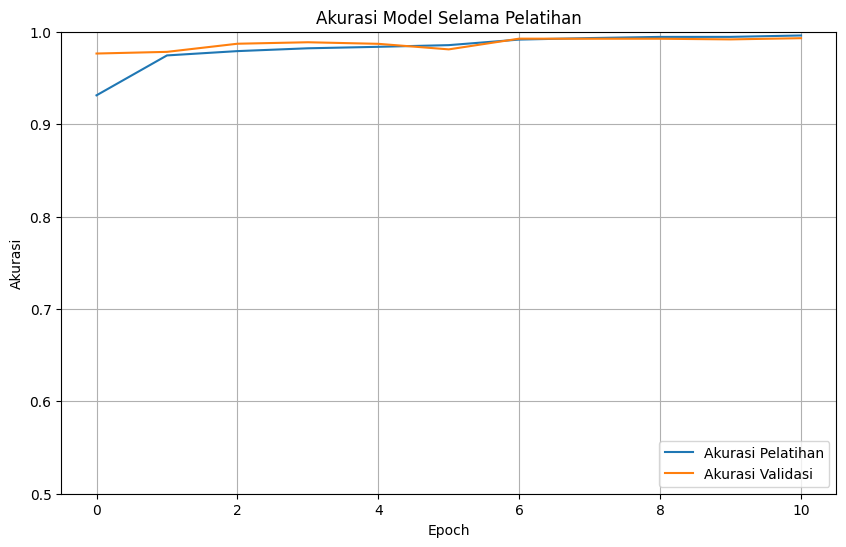

313/313 - 1s - loss: 0.1766 - accuracy: 0.9875 - 1s/epoch - 3ms/step

Loss pada data uji: 0.1766
Akurasi pada data uji: 0.9875


In [ ]:
# Plot akurasi pelatihan dan validasi
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.ylim([0.5, 1])  # Mengatur batas Y
plt.title('Akurasi Model Selama Pelatihan')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Evaluasi model pada data uji
test_loss, test_acc = cnn.evaluate(x_test, y_test, verbose=2)

# Menampilkan hasil evaluasi
print(f'\nLoss pada data uji: {test_loss:.4f}')
print(f'Akurasi pada data uji: {test_acc:.4f}')